<a href="https://colab.research.google.com/github/plaban1981/INEURON/blob/Supervised-Models/Desicion_Tree_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Poblem Statement : Predicting Survival in the Titanic Data Set

#### Loading Data and modules

In [0]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,export_graphviz

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,plot_confusion_matrix

from sklearn import tree
from IPython.display import Image
import pydotplus



In [0]:
url = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'

In [8]:
titanic = pd.read_csv(url)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch
(Parents/children aboard), and Fare to predict whether a passenger
survived.

In [0]:
dataset = titanic[['Pclass', 'Sex', 'Age', 'SibSp','Parch','Fare', 'Survived']]

## Dataset Satistics

In [47]:
dataset.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


## Finding Null Values

In [48]:
dataset.isnull().sum()[dataset.isnull().sum() > 0]

Age    177
dtype: int64

## Imputing missing values in Age with median 

In [0]:
median_age = dataset['Age'].median()

In [50]:
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].median())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
dataset.isnull().sum()[dataset.isnull().sum() > 0]

Series([], dtype: int64)

In [52]:
dataset[dataset['Age'] == 28.0].head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
5,3,male,28.0,0,0,8.4583,0
17,2,male,28.0,0,0,13.0000,1
19,3,female,28.0,0,0,7.2250,1
23,1,male,28.0,0,0,35.5000,1
26,3,male,28.0,0,0,7.2250,0


## Perform EDA

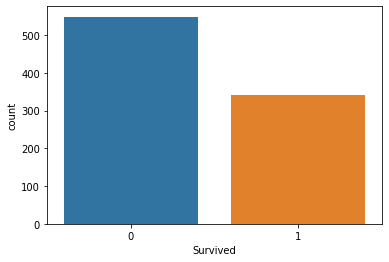

In [53]:
sb.countplot(x='Survived',data=dataset)

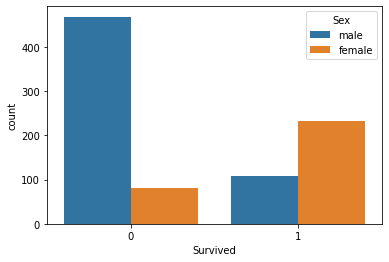

In [54]:
sb.countplot(x='Survived',data=dataset,hue='Sex')

## LabelEncoding Categorical Values

In [0]:
age_ohe = pd.get_dummies(dataset['Sex'])
dataset = pd.concat([dataset,age_ohe],axis=1)

In [57]:
dataset.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,female,male
0,3,male,22.0,1,0,7.2500,0,0,1
1,1,female,38.0,1,0,71.2833,1,1,0
2,3,female,26.0,0,0,7.9250,1,1,0
3,1,female,35.0,1,0,53.1000,1,1,0
4,3,male,35.0,0,0,8.0500,0,0,1


In [58]:
dataset.drop('Sex',inplace=True,axis=1)
dataset.head()

,Pclass,Age,SibSp,Parch,Fare,Survived,female,male
0,3,22.0,1,0,7.2500,0,0,1
1,1,38.0,1,0,71.2833,1,1,0
2,3,26.0,0,0,7.9250,1,1,0
3,1,35.0,1,0,53.1000,1,1,0
4,3,35.0,0,0,8.0500,0,0,1


In [0]:
X = dataset.drop('Survived',axis=1)
Y = dataset['Survived']

## Prepare Training and Test Dataset

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.15,random_state=1)

In [74]:
print(X_train.shape,X_test.shape)

(757, 7) (134, 7)


In [75]:
print(y_train.shape,y_test.shape)

(757,) (134,)


## Normalize data

In [0]:
# Create an scaler object
sc = StandardScaler()

In [0]:
# Create a logistic regression object with an L2 penalty
decisiontree = tree.DecisionTreeClassifier()

In [0]:
from sklearn.pipeline import Pipeline
# Create a pipeline of three steps. First, standardize the data.
# Second,  train a Decision Tree Classifier on the data.
pipe = Pipeline(steps=[('sc', sc),('decisiontree', decisiontree)])

In [0]:
# Create lists of parameter for Decision Tree Classifier
criterion = ['gini', 'entropy']
max_depth = [4,6,8,12]

In [0]:
# Create a dictionary of all the parameter options 
# Access the parameters of steps of a pipeline by using '__’
parameters = dict(decisiontree__criterion=criterion,
                  decisiontree__max_depth=max_depth)

## Conduct Parameter Optmization With Pipeline

In [76]:
# Create a grid search object
clf = GridSearchCV(pipe, parameters,cv=5,verbose=2)
# Fit the grid search
clf.fit(X_train.values, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] decisiontree__criterion=gini, decisiontree__max_depth=4 .........
[CV]  decisiontree__criterion=gini, decisiontree__max_depth=4, total=   0.0s
[CV] decisiontree__criterion=gini, decisiontree__max_depth=4 .........
[CV]  decisiontree__criterion=gini, decisiontree__max_depth=4, total=   0.0s
[CV] decisiontree__criterion=gini, decisiontree__max_depth=4 .........
[CV]  decisiontree__criterion=gini, decisiontree__max_depth=4, total=   0.0s
[CV] decisiontree__criterion=gini, decisiontree__max_depth=4 .........
[CV]  decisiontree__criterion=gini, decisiontree__max_depth=4, total=   0.0s
[CV] decisiontree__criterion=gini, decisiontree__max_depth=4 .........
[CV]  decisiontree__criterion=gini, decisiontree__max_depth=4, total=   0.0s
[CV] decisiontree__criterion=gini, decisiontree__max_depth=6 .........
[CV]  decisiontree__criterion=gini, decisiontree__max_depth=6, total=   0.0s
[CV] decisiontree__criterion=gini, decisiontree__max

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  decisiontree__criterion=entropy, decisiontree__max_depth=12, total=   0.0s
[CV] decisiontree__criterion=entropy, decisiontree__max_depth=12 .....
[CV]  decisiontree__criterion=entropy, decisiontree__max_depth=12, total=   0.0s
[CV] decisiontree__criterion=entropy, decisiontree__max_depth=12 .....
[CV]  decisiontree__criterion=entropy, decisiontree__max_depth=12, total=   0.0s
[CV] decisiontree__criterion=entropy, decisiontree__max_depth=12 .....
[CV]  decisiontree__criterion=entropy, decisiontree__max_depth=12, total=   0.0s


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('sc',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('decisiontree',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                

In [77]:
 # View The Best Parameters
print('Best Criterion:', clf.best_estimator_.get_params()['decisiontree__criterion'])
print('Best max_depth:', clf.best_estimator_.get_params()['decisiontree__max_depth'])
print(); print(clf.best_estimator_.get_params()['decisiontree'])

Best Criterion: gini
Best max_depth: 4

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [0]:
y_pred = clf.predict(X_test)

## Accuracy Score

In [80]:
print(f'Accuracy Score : {accuracy_score(y_test,y_pred)}')

Accuracy Score : 0.7835820895522388


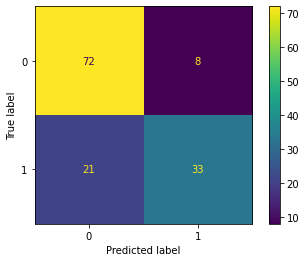

In [79]:
plot_confusion_matrix(clf,X_test,y_test,values_format='.2g')

## Cross Validation

In [85]:
# Use Training Cross Validation To Evaluate Model 
from sklearn.model_selection import cross_val_score
CV_Result = cross_val_score(clf, X_train, y_train, cv=4, n_jobs=-1)
print(); print(CV_Result)
print(); print(CV_Result.mean())
print(); print(CV_Result.std())


[0.8        0.77248677 0.86772487 0.8042328 ]

0.811111111111111

0.03488454123148556


In [86]:
# Use Test Cross Validation To Evaluate Model 
from sklearn.model_selection import cross_val_score
CV_Result = cross_val_score(clf, X_test, y_test, cv=4, n_jobs=-1)
print(); print(CV_Result)
print(); print(CV_Result.mean())
print(); print(CV_Result.std())


[0.67647059 0.70588235 0.72727273 0.75757576]

0.7168003565062389

0.02965635215466377
